In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
Titanic = pd.read_csv("/content/drive/MyDrive/ML/Titanic.csv")

In [ ]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Titanic.shape

(891, 12)

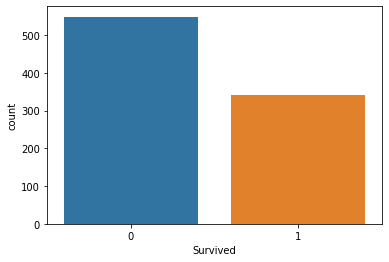

In [ ]:
sns.countplot(x='Survived', data=Titanic)

No. survived is less than no. survived.

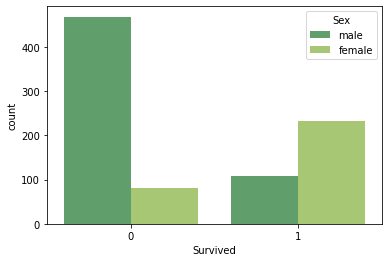

In [ ]:
sns.countplot(x='Survived',hue ='Sex', data=Titanic, palette='summer')

Male are thrice as female who are not survived.

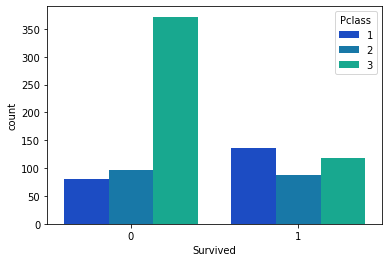

In [ ]:
sns.countplot(x='Survived',hue= 'Pclass', data= Titanic, palette='winter' )

1st class passanger are more in no. as survived as compare to most of not survived are belong to 3rd class.

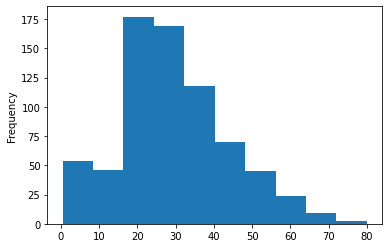

In [ ]:
Titanic['Age'].plot.hist()

Passanger are travelling belong to 20 to 40 yrs age group.

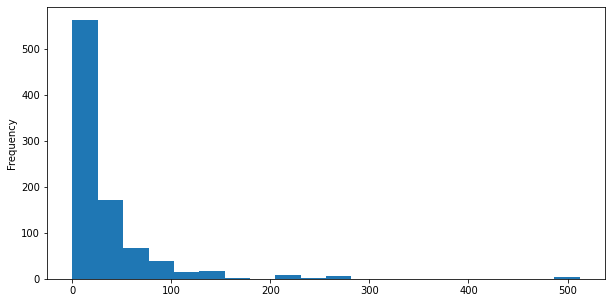

In [ ]:
Titanic['Fare'].plot.hist(bins=20, figsize=(10,5))

most of the ticket bought are under fare 100 and very less on the higher side. 

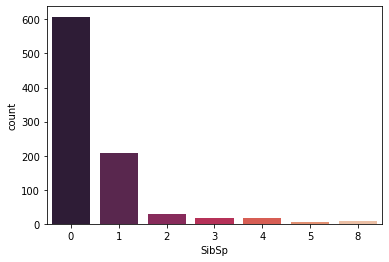

In [ ]:
sns.countplot(x='SibSp', data=Titanic, palette= 'rocket')

most of the passangers do not have their sibilings aboard.

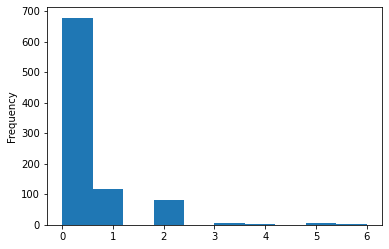

In [ ]:
Titanic['Parch'].plot.hist()

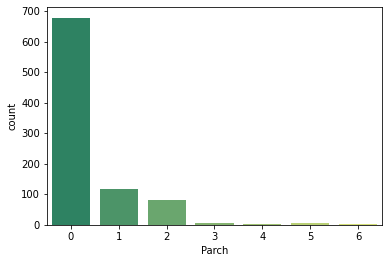

In [ ]:
sns.countplot(x='Parch', data=Titanic , palette= 'summer')

less no. of parents and sibilings aboard the ship.

In [ ]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

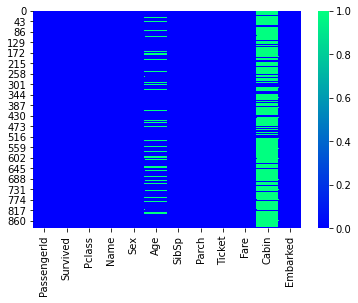

In [ ]:
sns.heatmap(Titanic.isnull(), cmap='winter')

null value are present in age and highest in cabin.

In [ ]:
Titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
Titanic['Age'].fillna(Titanic['Age'].mean(), inplace = True)

Missing value in age is filled with mean.

In [ ]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

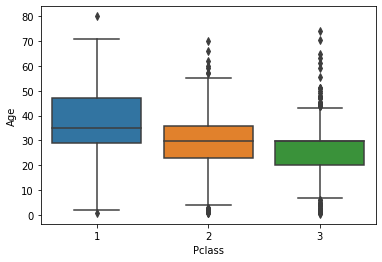

In [ ]:
sns.boxplot(x='Pclass', y='Age', data= Titanic)

most of older age passanger are travelling in class 1st and 2nd.

**Drop the Parch and Cabin Column**

In [ ]:
Titanic=Titanic.drop(['Ticket'],axis=1)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Ticket has not significat value which come into use.

In [ ]:
Titanic.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
Titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S


most of Cabin columns value is missing, so there is no mean to bring into use.

In [ ]:
Titanic.dropna(inplace=True)

In [ ]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

**One Hot Encoding**

In [ ]:
pd.get_dummies(Titanic['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
Sex=pd.get_dummies(Titanic['Sex'], drop_first=True)
Sex.head(3)

,male
0,1
1,0
2,0


In [ ]:
Embark=pd.get_dummies(Titanic['Embarked'])

In [ ]:
Embark.head(2)

,C,Q,S
0,0,0,1
1,1,0,0


In [ ]:
Embark=pd.get_dummies(Titanic['Embarked'], drop_first=True)

In [ ]:
Embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
Titanic=pd.concat([Titanic,Sex,Embark], axis=1)

In [ ]:
Titanic.drop(['Name','PassengerId','Pclass','Sex','Embarked'], axis=1, inplace=True)

In [ ]:
Titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


In [ ]:
x=Titanic.drop('Survived', axis=1)
y=Titanic['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [ ]:
x_train.shape

(622, 7)

In [ ]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()

In [ ]:
Lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction= Lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.83      0.87      0.85       167\n           1       0.76      0.70      0.73       100\n\n    accuracy                           0.81       267\n   macro avg       0.79      0.78      0.79       267\nweighted avg       0.80      0.81      0.80       267\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, prediction)

array([[145,  22],
       [ 30,  70]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, prediction)

0.8052434456928839